<a href="https://colab.research.google.com/github/devrimakkoy/Global_AI_Hub_Proje/blob/main/Insurance_Forecast1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Insurance Forecast
- We will try to predict the individual medical costs billed by health insurance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.figsize"] = (12,8)


In [ ]:
df = pd.read_csv("/content/sample_data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


#### Part 1 - Exploratory Data Analysis (EDA)
##### Content;
- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance


In [ ]:
# Let's see the descriptive statistics summary of our dataframe.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.000,39.207,14.050,18.000,27.000,39.000,51.000,64.000
bmi,1338.000,30.663,6.098,15.960,26.296,30.400,34.694,53.130
children,1338.000,1.095,1.205,0.000,0.000,1.000,2.000,5.000
charges,1338.000,13270.422,12110.011,1121.874,4740.287,9382.033,16639.913,63770.428


We can see that the variables are clustered around the mean except for the "charges" variable. It is more spread out

In [ ]:
# See if there is any "null" values in any of the variables and let's look on their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

We have 7 variables and 1338 entries in our dataframe.

### BMI

In [ ]:
# Let's look at the distribution of the bmi on the data.
df["bmi"].describe().T

count   1338.000
mean      30.663
std        6.098
min       15.960
25%       26.296
50%       30.400
75%       34.694
max       53.130
Name: bmi, dtype: float64

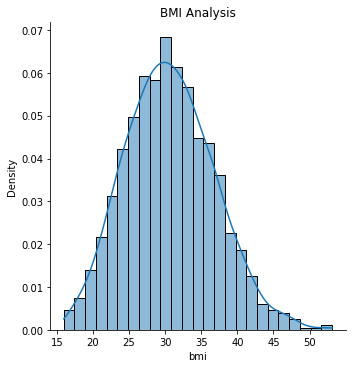

In [ ]:
# Visualize the distribution of "bmi"
sns.displot(data=df['bmi'], kde=True, stat='density', linewidth=1)
plt.title('BMI Analysis')
plt.show()

As we can see "bmi" variable has a normal distribution. It showing that data near the mean are more frequent than the data far from the mean.

### CHARGES BY SMOKER

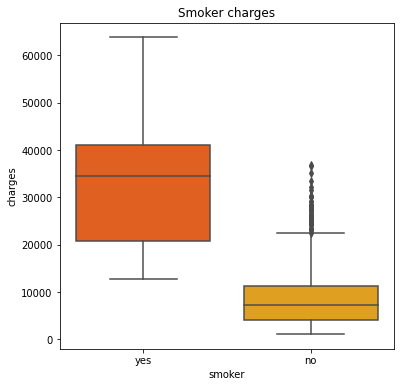

In [ ]:
# Smoker and charges
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='smoker', y='charges', palette="autumn")
plt.title('Smoker charges')
plt.show()

If a person is a smoker it is highly possible that the insurance charges are higher.

### SMOKER BY REGION

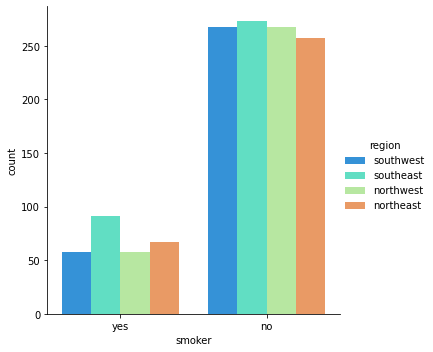

In [ ]:
# Smoking rates by region
sns.catplot(x="smoker", kind="count",hue = 'region', palette="rainbow", data=df)

We can say that the number of people who do not smoke is higher in all 4 regions. But when we look at the smokers we see that the people on southeast, smokes more.

### BMI BY SEX

In [ ]:
# First, let's look at the gender distribution on the data.
gender = df["sex"].value_counts()
gender

male      676
female    662
Name: sex, dtype: int64

Text(0, 0.5, 'Density')

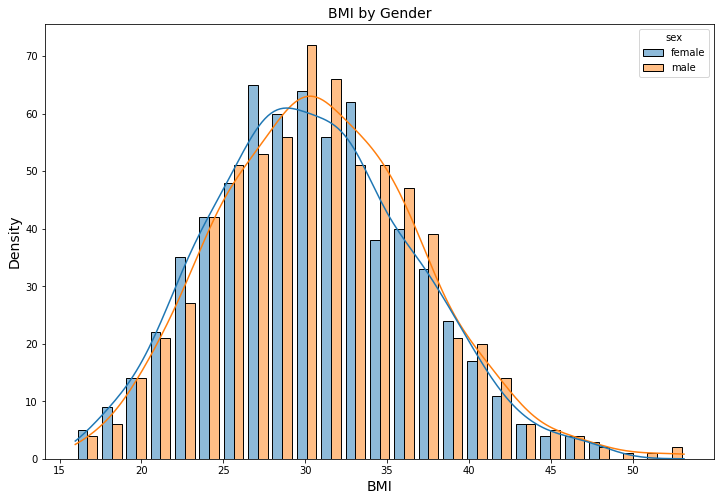

In [ ]:
# BMI's by gender
sns.histplot(data=df, x="bmi", hue="sex", multiple="dodge", shrink=.8, kde=True)
plt.title('BMI by Gender', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Density', fontsize=14)

We can see the gender and bmi distribution by looking at this chart. We can say that generally, the men have a higher body mass index than women.

### CHILDREN

In [ ]:
# First, let's look at the children counts.
children = df["children"].value_counts()
children

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

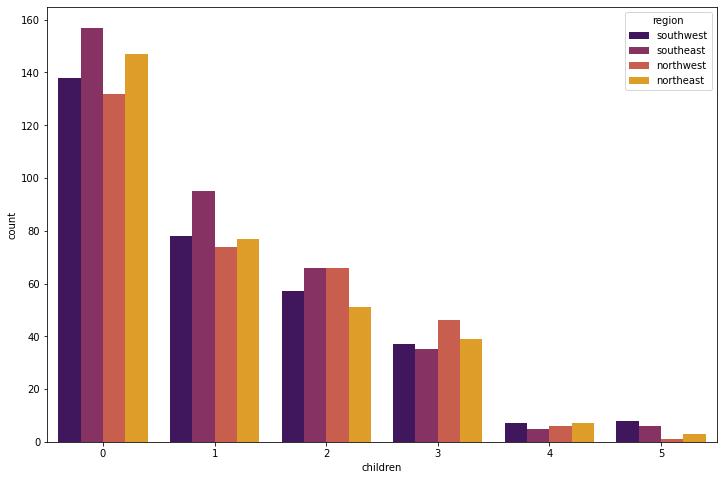

In [ ]:
# Now let's look at the Children by region
ax = sns.countplot(x="children",hue="region", data=df, palette="inferno")

We can see the number of children by region. 

### BMI BY AGE

Text(0, 0.5, 'BMI')

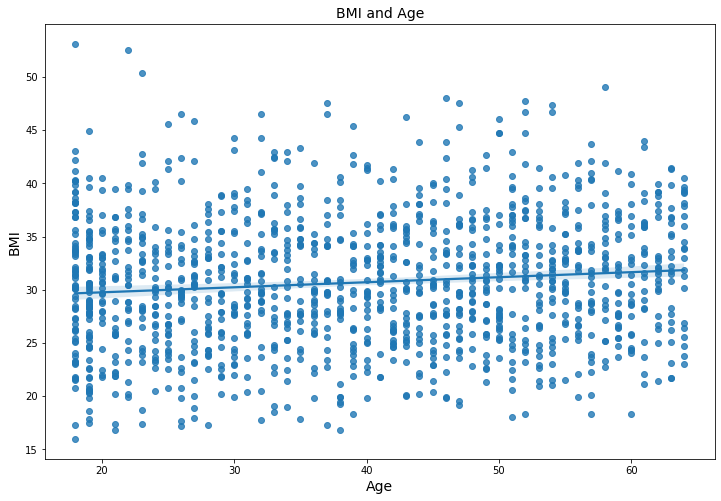

In [ ]:
# Age and bmi
sns.regplot(x=df["age"], y=df["bmi"])
plt.title('BMI and Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('BMI', fontsize=14)


### RELATIONSHIP BETWEEN "BMI" and "CHILDREN"

Text(0, 0.5, 'Density')

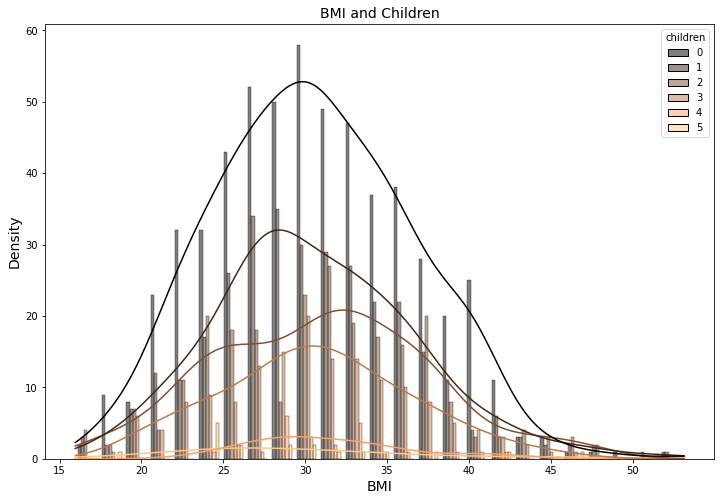

In [ ]:
sns.histplot(data=df, x="bmi", hue="children", multiple="dodge", shrink=.8, kde=True, palette="copper")
plt.title('BMI and Children', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Density', fontsize=14)

### OUTLIERS ON THE "BMI" VARIABLE

- in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

In [ ]:
#Flooring
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
bmi_outliers = df[(df['bmi'] < q1 - whisker_width*iqr) | (df['bmi'] > q3 + whisker_width*iqr)]
bmi_outliers.shape

(9, 7)

In [ ]:
bmi_outliers.head()

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.060,0,no,southeast,11381.325
286,46,female,48.070,2,no,northeast,9432.925
401,47,male,47.520,1,no,southeast,8083.920
543,54,female,47.410,0,yes,southeast,63770.428
847,23,male,50.380,1,no,southeast,2438.055


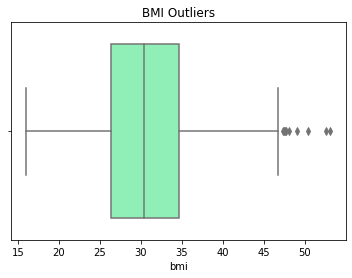

In [ ]:
# Let's see the outliers
plt.figure(figsize=(6,4))
sns.boxplot(df["bmi"], palette="rainbow")
plt.title('BMI Outliers')
plt.show()

There is some outliers on the bmi variable.

In [ ]:
# The code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘bmi’ variable.
lower_whisker = q1 -(whisker_width*iqr)
upper_whisker = q3 + (whisker_width*iqr)
df['bmi']=np.where(df['bmi']>upper_whisker,upper_whisker,np.where(df['bmi']<lower_whisker,lower_whisker,df['bmi']))

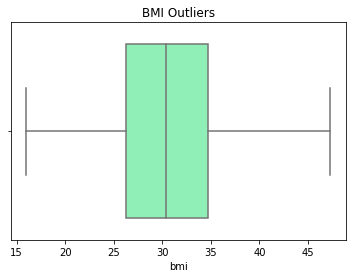

In [ ]:
# Without the outliers
plt.figure(figsize=(6,4))
sns.boxplot(df["bmi"], palette="rainbow")
plt.title('BMI Outliers')
plt.show()

### OUTLIERS ON THE "CHARGES" VARIABLE

In [ ]:
# Flooring
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
w_width = 1.5
charges_outliers = df[(df['charges'] < Q1 - whisker_width*IQR) | (df['charges'] > Q3 + whisker_width*IQR)]
charges_outliers.shape

(139, 7)

In [ ]:
charges_outliers.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.758
19,30,male,35.300,0,yes,southwest,36837.467
23,34,female,31.920,1,yes,northeast,37701.877
29,31,male,36.300,2,yes,southwest,38711.000
30,22,male,35.600,0,yes,southwest,35585.576


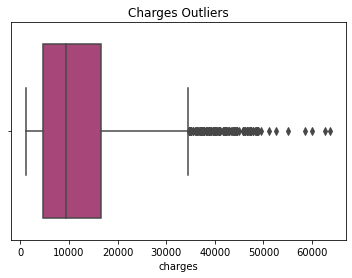

In [ ]:
# See the outliers on the "charges" variable
plt.figure(figsize=(6,4))
sns.boxplot(df["charges"], palette="magma")
plt.title('Charges Outliers')
plt.show()

There is lots of outliers on the charges variable.

In [ ]:
# Drop the outliers
lower = Q1 -(w_width*IQR)
upper = Q3 + (w_width*IQR)
df['charges']=np.where(df['charges']>upper,upper,np.where(df['charges']<lower,lower,df['charges']))

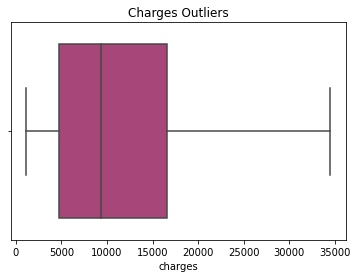

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(df["charges"], palette="magma")
plt.title('Charges Outliers')
plt.show()

### RELATIPONSHIO BETWEEN "BMI" and "CHARGES"

Text(0, 0.5, 'Charges')

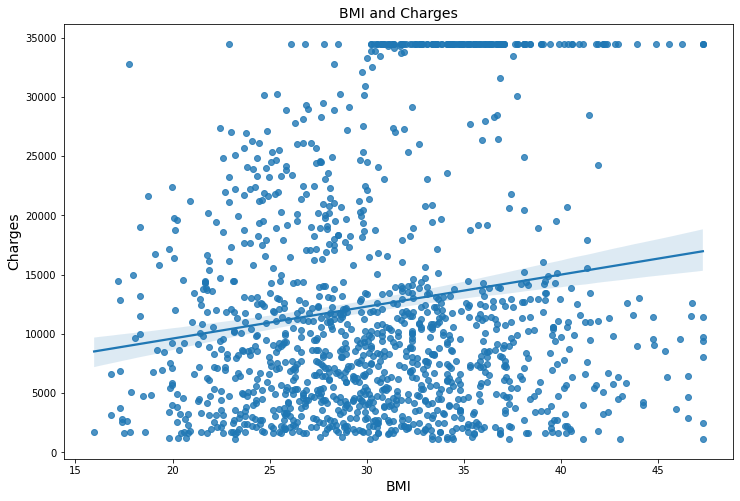

In [ ]:
sns.regplot(x=df["bmi"], y=df["charges"])
plt.title('BMI and Charges', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Charges', fontsize=14)

We can say that there is a slight linearity between BMI and Charges.

### RELATIONSHIP BETWEEN “REGION”, “SMOKER” and “BMI”

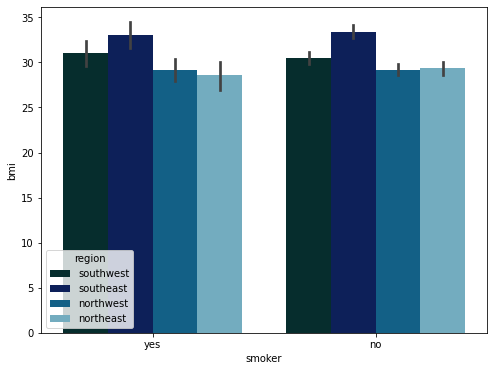

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x="smoker", hue="region", y="bmi", data=df, orient="v", palette="ocean")
plt.show()

#### Part 2 - Data Preprocessing

#### Let's prepare our dataframe for modeling

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [ ]:
# Change the column order so that the categorical data comes to the end
df = df[['age', 'bmi', 'children', 'sex', 'smoker','region','charges']]
df.head()

,age,bmi,children,sex,smoker,region,charges
0,19,27.900,0,female,yes,southwest,16884.924
1,18,33.770,1,male,no,southeast,1725.552
2,28,33.000,3,male,no,southeast,4449.462
3,33,22.705,0,male,no,northwest,21984.471
4,32,28.880,0,male,no,northwest,3866.855


In [ ]:
# Is there any missing values (%)
df.isna().sum() / df.shape[0] * 100

age        0.000
bmi        0.000
children   0.000
sex        0.000
smoker     0.000
region     0.000
charges    0.000
dtype: float64

There is no missing value in our data.

In [ ]:
# One Hot Encoding the "region" columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['region']]).toarray())
df = df.join(encoder_df)
df

,age,bmi,children,sex,smoker,region,charges,0,1,2,3
0,19,27.900,0,female,yes,southwest,16884.924,0.000,0.000,0.000,1.000
1,18,33.770,1,male,no,southeast,1725.552,0.000,0.000,1.000,0.000
2,28,33.000,3,male,no,southeast,4449.462,0.000,0.000,1.000,0.000
3,33,22.705,0,male,no,northwest,21984.471,0.000,1.000,0.000,0.000
4,32,28.880,0,male,no,northwest,3866.855,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,male,no,northwest,10600.548,0.000,1.000,0.000,0.000
1334,18,31.920,0,female,no,northeast,2205.981,1.000,0.000,0.000,0.000
1335,18,36.850,0,female,no,southeast,1629.833,0.000,0.000,1.000,0.000
1336,21,25.800,0,female,no,southwest,2007.945,0.000,0.000,0.000,1.000


In [ ]:
df = df[['age', 'bmi', 'children', 'sex', 'smoker',0,1,2,3,'charges']]
df.head()

,age,bmi,children,sex,smoker,0,1,2,3,charges
0,19,27.900,0,female,yes,0.000,0.000,0.000,1.000,16884.924
1,18,33.770,1,male,no,0.000,0.000,1.000,0.000,1725.552
2,28,33.000,3,male,no,0.000,0.000,1.000,0.000,4449.462
3,33,22.705,0,male,no,0.000,1.000,0.000,0.000,21984.471
4,32,28.880,0,male,no,0.000,1.000,0.000,0.000,3866.855


In [ ]:
# Cahnge the column names of the one hot encoded columns
df.columns = ['age', 'bmi', 'children', 'sex', 'smoker',"southwest","southeast","northwest","northeast",'charges']
df.head()

,age,bmi,children,sex,smoker,southwest,southeast,northwest,northeast,charges
0,19,27.900,0,female,yes,0.000,0.000,0.000,1.000,16884.924
1,18,33.770,1,male,no,0.000,0.000,1.000,0.000,1725.552
2,28,33.000,3,male,no,0.000,0.000,1.000,0.000,4449.462
3,33,22.705,0,male,no,0.000,1.000,0.000,0.000,21984.471
4,32,28.880,0,male,no,0.000,1.000,0.000,0.000,3866.855


In [ ]:
#Label encode the "sex" and "smoke" columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df.sex.values)
df['smoker'] = le.fit_transform(df.smoker.values)
df

,age,bmi,children,sex,smoker,southwest,southeast,northwest,northeast,charges
0,19,27.900,0,0,1,0.000,0.000,0.000,1.000,16884.924
1,18,33.770,1,1,0,0.000,0.000,1.000,0.000,1725.552
2,28,33.000,3,1,0,0.000,0.000,1.000,0.000,4449.462
3,33,22.705,0,1,0,0.000,1.000,0.000,0.000,21984.471
4,32,28.880,0,1,0,0.000,1.000,0.000,0.000,3866.855
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0.000,1.000,0.000,0.000,10600.548
1334,18,31.920,0,0,0,1.000,0.000,0.000,0.000,2205.981
1335,18,36.850,0,0,0,0.000,0.000,1.000,0.000,1629.833
1336,21,25.800,0,0,0,0.000,0.000,0.000,1.000,2007.945


### SPLITTING THE DATASET

In [ ]:
# Splitting the Dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1,1)

In [ ]:
print(X)

[[19.   27.9   0.   ...  0.    0.    1.  ]
 [18.   33.77  1.   ...  0.    1.    0.  ]
 [28.   33.    3.   ...  0.    1.    0.  ]
 ...
 [18.   36.85  0.   ...  0.    1.    0.  ]
 [21.   25.8   0.   ...  0.    0.    1.  ]
 [61.   29.07  0.   ...  1.    0.    0.  ]]


In [ ]:
print(y)

[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


### SPLITTING AS X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[53.   26.6   0.   ...  1.    0.    0.  ]
 [53.   21.4   1.   ...  0.    0.    1.  ]
 [18.   37.29  0.   ...  0.    1.    0.  ]
 ...
 [51.   34.96  2.   ...  0.    0.    0.  ]
 [40.   22.22  2.   ...  0.    1.    0.  ]
 [57.   27.94  1.   ...  0.    1.    0.  ]]


In [ ]:
print(X_test)

[[19.    35.53   0.    ...  1.     0.     0.   ]
 [57.    31.54   0.    ...  1.     0.     0.   ]
 [51.    37.     0.    ...  0.     0.     1.   ]
 ...
 [47.    38.94   2.    ...  0.     1.     0.   ]
 [19.    36.575  0.    ...  1.     0.     0.   ]
 [35.    26.125  0.    ...  0.     0.     0.   ]]


In [ ]:
print(y_train)

[[10355.641    ]
 [10065.413    ]
 [ 1141.4451   ]
 ...
 [34489.3505625]
 [19444.2658   ]
 [11554.2236   ]]


In [ ]:
print(y_test)

[[ 1646.4297   ]
 [11353.2276   ]
 [ 8798.593    ]
 [10381.4787   ]
 [ 2103.08     ]
 [34489.3505625]
 [ 9304.7019   ]
 [11658.11505  ]
 [ 3070.8087   ]
 [19539.243    ]
 [12629.8967   ]
 [11538.421    ]
 [ 6338.0756   ]
 [ 7050.642    ]
 [ 1137.4697   ]
 [ 8968.33     ]
 [21984.47061  ]
 [ 6414.178    ]
 [28287.89766  ]
 [13462.52     ]
 [ 9722.7695   ]
 [34489.3505625]
 [ 8026.6666   ]
 [ 8444.474    ]
 [ 2203.47185  ]
 [ 6664.68595  ]
 [ 8606.2174   ]
 [ 8283.6807   ]
 [ 5375.038    ]
 [ 3645.0894   ]
 [11674.13     ]
 [11737.84884  ]
 [24873.3849   ]
 [33750.2918   ]
 [24180.9335   ]
 [ 9863.4718   ]
 [34489.3505625]
 [17942.106    ]
 [11856.4115   ]
 [34489.3505625]
 [ 4349.462    ]
 [11743.9341   ]
 [19749.38338  ]
 [12347.172    ]
 [ 4931.647    ]
 [30259.99556  ]
 [27724.28875  ]
 [34489.3505625]
 [ 9644.2525   ]
 [14394.39815  ]
 [12557.6053   ]
 [11881.358    ]
 [ 2352.96845  ]
 [ 9101.798    ]
 [17178.6824   ]
 [ 3994.1778   ]
 [34489.3505625]
 [12644.589    ]
 [22395.74424 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.76086957, 0.3396106 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.76086957, 0.17363549, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.68081711, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7173913 , 0.60644749, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.47826087, 0.19980849, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.84782609, 0.3823811 , 0.2       , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.02173913, 0.62464092, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.84782609, 0.49728695, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.7173913 , 0.6715608 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.63043478, 0.73348229, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.02173913, 0.65799553, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.36956522, 0.32444941, 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### CHOOSING A MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

We will try some vanilla models.

In [ ]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
dt = DecisionTreeRegressor(max_leaf_nodes = 10, random_state = 0)
linr = LinearRegression()
br = BayesianRidge(n_iter = 100)
gbr = GradientBoostingRegressor(n_estimators = 10)
rid = Ridge(alpha = 0.1, max_iter = 100000)
las = Lasso(alpha = 1, max_iter = 100000)

Fitting Model

In [ ]:
rf.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
linr.fit(X_train_scaled, y_train)
br.fit(X_train_scaled, y_train)
gbr.fit(X_train_scaled, y_train)
rid.fit(X_train_scaled, y_train)
las.fit(X_train_scaled, y_train)

Lasso(alpha=1, max_iter=100000)

Predicting Model

In [ ]:
rf_pred = rf.predict(X_test_scaled)
dt_pred = dt.predict(X_test_scaled)
linr_pred = linr.predict(X_test_scaled)
br_pred = br.predict(X_test_scaled)
gbr_pred = gbr.predict(X_test_scaled)
rid_pred = rid.predict(X_test_scaled)
las_pred = las.predict(X_test_scaled)

In [ ]:
pred_list = [rf_pred, dt_pred, linr_pred, br_pred, gbr_pred, rid_pred, las_pred]

Model Scores

In [ ]:
rf_sc = rf.score(X_test_scaled, y_test)
dt_sc = dt.score(X_test_scaled, y_test)
linr_sc = linr.score(X_test_scaled, y_test)
br_sc = br.score(X_test_scaled, y_test)
gbr_sc = gbr.score(X_test_scaled, y_test)
rid_sc = rid.score(X_test_scaled, y_test)
las_sc = las.score(X_test_scaled, y_test)



score_result = [rf_sc, dt_sc, linr_sc, gbr_sc, br_sc, rid_sc, las_sc]

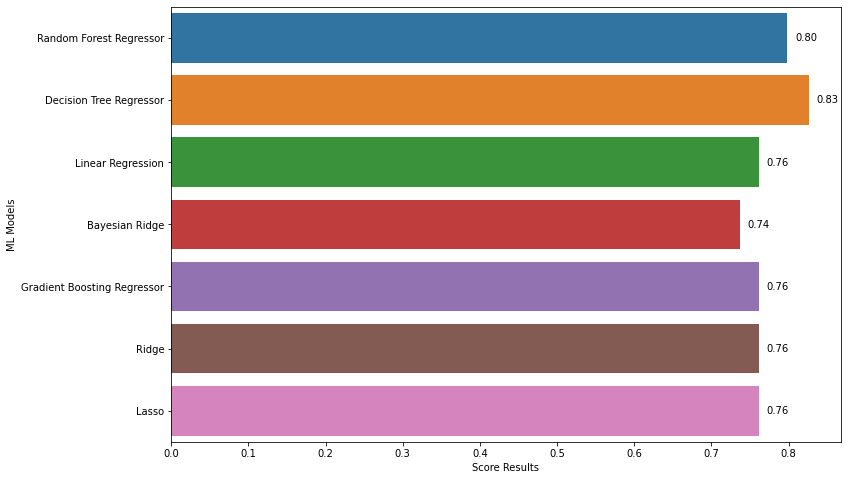

In [ ]:
predname_list=["Random Forest Regressor","Decision Tree Regressor","Linear Regression","Bayesian Ridge","Gradient Boosting Regressor","Ridge","Lasso"]
score_results = pd.DataFrame({"Score Results":score_result, "ML Models":predname_list})

ax = sns.barplot("Score Results", "ML Models", data = score_results)


for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.01,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment


As its seen above DT model had best score. So we might try some boosting algorithms.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_test, X_test):

    print("mae:",mean_absolute_error(y_test, X_test),
    "mse:", mean_squared_error(y_test, X_test),
    "r2:", r2_score(y_test, X_test))                      
    
    return train_val

In [ ]:
for i in range(len(pred_list)):
  print(predname_list[i],":")
  train_val(y_test, pred_list[i])
  print("")

Random Forest Regressor :
mae: 2320.5862228565297 mse: 20405006.037775703 r2: 0.7981852789394042

Decision Tree Regressor :
mae: 2213.772778438702 mse: 17568118.8002549 r2: 0.8262433743626896

Linear Regression :
mae: 3158.2096893800144 mse: 24131186.020585086 r2: 0.7613316768154901

Bayesian Ridge :
mae: 3162.2841815636825 mse: 24137373.652256705 r2: 0.7612704783450008

Gradient Boosting Regressor :
mae: 3950.94878099514 mse: 26615629.602017682 r2: 0.7367594082530906

Ridge :
mae: 3159.267111762194 mse: 24132701.329677362 r2: 0.7613166897245177

Lasso :
mae: 3158.765618856336 mse: 24133765.567672145 r2: 0.7613061639303248



In [ ]:
np.set_printoptions(precision=2)


print(np.concatenate((dt_pred.reshape(len(dt_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3286.02  1646.43]
 [13847.68 11353.23]
 [10427.82  8798.59]
 [10427.82 10381.48]
 [ 3286.02  2103.08]
 [34429.05 34489.35]
 [10427.82  9304.7 ]
 [13847.68 11658.12]
 [ 6599.95  3070.81]
 [18529.03 19539.24]
 [13847.68 12629.9 ]
 [13847.68 11538.42]
 [ 6599.95  6338.08]
 [ 6599.95  7050.64]
 [ 3286.02  1137.47]
 [10427.82  8968.33]
 [ 6599.95 21984.47]
 [ 6599.95  6414.18]
 [13847.68 28287.9 ]
 [13847.68 13462.52]
 [13847.68  9722.77]
 [34429.05 34489.35]
 [10427.82  8026.67]
 [10427.82  8444.47]
 [ 3286.02  2203.47]
 [ 6599.95  6664.69]
 [ 6599.95  8606.22]
 [10427.82  8283.68]
 [ 6599.95  5375.04]
 [ 6599.95  3645.09]
 [13847.68 11674.13]
 [ 6599.95 11737.85]
 [25085.79 24873.38]
 [34429.05 33750.29]
 [25085.79 24180.93]
 [13847.68  9863.47]
 [34429.05 34489.35]
 [18529.03 17942.11]
 [13847.68 11856.41]
 [34429.05 34489.35]
 [ 6599.95  4349.46]
 [13847.68 11743.93]
 [10427.82 19749.38]
 [13847.68 12347.17]
 [ 6599.95  4931.65]
 [13847.68 30260.  ]
 [ 3286.02 27724.29]
 [34429.05 34

### AdaBoost

In [ ]:
#We will try Adaboost first

In [ ]:
df2 = pd.read_csv("/content/sample_data/insurance.csv")

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [ ]:
X=df2.drop("charges", axis=1)
y=df2.charges

In [ ]:
cat = X.select_dtypes("object").columns
cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,age,sex,bmi,children,smoker,region
0,19,0.000,27.900,0,1.000,3.000
1,18,1.000,33.770,1,0.000,2.000
2,28,1.000,33.000,3,0.000,2.000
3,33,1.000,22.705,0,0.000,1.000
4,32,1.000,28.880,0,0.000,1.000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (1070, 6)
Train target shape   :  (1070,)
Test features shape  :  (268, 6)
Test target shape    :  (268,)


In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
#base_estimator=DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=101, n_estimators=50)

In [ ]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

In [ ]:
cat = X.select_dtypes("object").columns
cat

Index([], dtype='object')

In [ ]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
train_val(ada_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.836,0.856
mae,3686.658,3642.135
mse,23737454.805,21816022.352
rmse,4872.110,4670.763


In [ ]:
ada_model = ada_model.score(X_test, y_test)
score_result = [rf_sc, dt_sc, linr_sc, gbr_sc, br_sc, rid_sc, las_sc, ada_model]

Text(0.5, 1.0, 'Score Results')

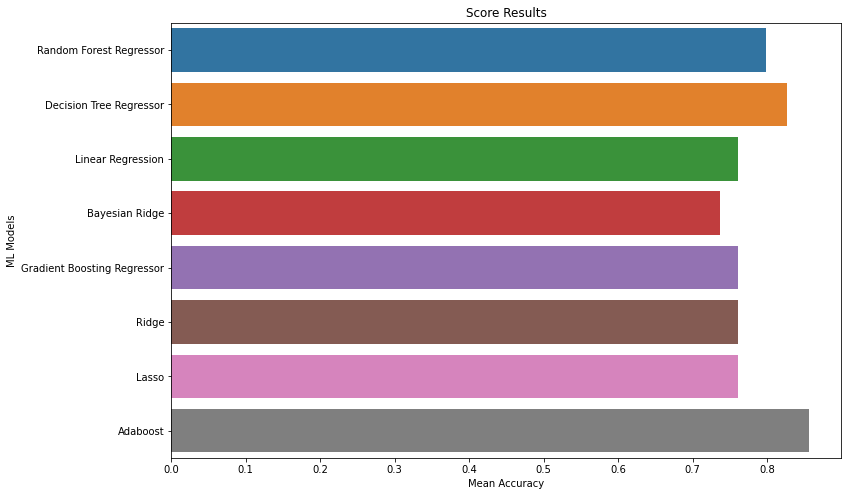

In [ ]:
predname_list=["Random Forest Regressor","Decision Tree Regressor","Linear Regression","Bayesian Ridge","Gradient Boosting Regressor","Ridge","Lasso", "Adaboost"]
score_results = pd.DataFrame({"Score Results":score_result, "ML Models":predname_list})

g = sns.barplot("Score Results", "ML Models", data = score_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Score Results")


#### AdaBoost GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"n_estimators":[50, 100, 200, 300, 500],
              "learning_rate":[0.001, 0.005, 0.008, 0.01],
              "loss": ["linear", "square"]
            }

In [ ]:
model = AdaBoostRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.008, 0.01],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [ ]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.853,0.878
mae,2765.994,2688.943
mse,21292194.759,18592037.487
rmse,4614.347,4311.848


In [ ]:
b = train_val(grid_model, X_train, y_train, X_test, y_test)

In [ ]:
b.test.R2


0.8775137725359176

In [ ]:
grid_model_sc = grid_model.score(X_test, y_test)
score_result = [rf_sc, dt_sc, gbr_sc, ada_model, b.test.R2]

Text(0.5, 1.0, 'Score Results')

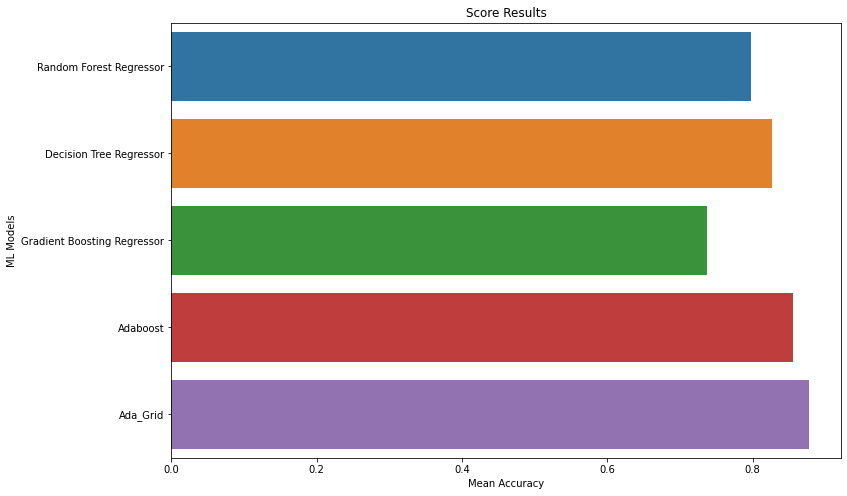

In [ ]:
predname_list=["Random Forest Regressor","Decision Tree Regressor","Gradient Boosting Regressor", "Adaboost", "Ada_Grid"]
score_results = pd.DataFrame({"Score Results":score_result, "ML Models":predname_list})

g = sns.barplot("Score Results", "ML Models", data = score_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Score Results")


AdaBoost with GridsearchCV has got some better score.

### XGBoost

We will try if XGBoost will work better.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror") #objective="reg:squarederror"

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=101)

In [ ]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.893,0.888
mae,2166.608,2366.827
mse,15477076.714,16950526.994
rmse,3934.092,4117.102


In [ ]:
xgb_model = xgb_model.score(X_test, y_test)
score_result = [rf_sc, dt_sc, linr_sc, gbr_sc, br_sc, rid_sc, las_sc, ada_model, xgb_model]

In [ ]:
xgb_model

0.8883282100428667

In [ ]:
score_result 

[0.7981852789394042,
 0.8262433743626896,
 0.7613316768154901,
 0.7367594082530906,
 0.7612704783450008,
 0.7613166897245177,
 0.7613061639303248,
 0.8562738334549217,
 0.8883282100428667]

Text(0.5, 1.0, 'Score Results')

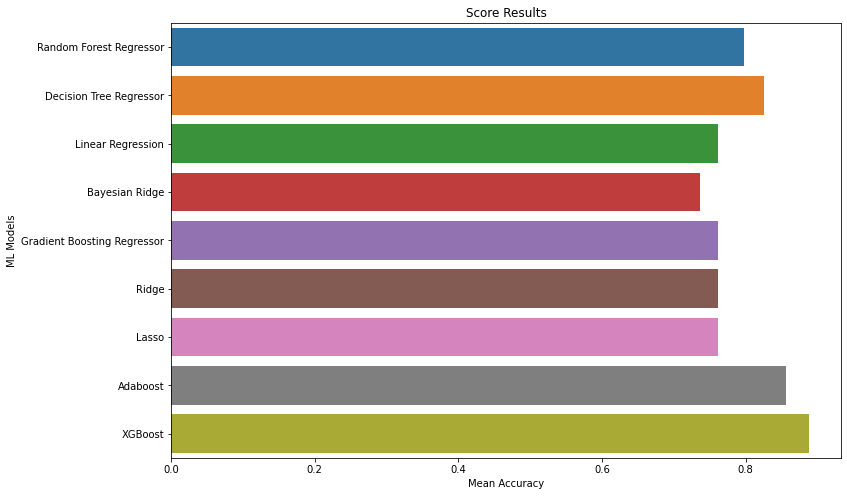

In [ ]:
predname_list=["Random Forest Regressor","Decision Tree Regressor","Linear Regression","Bayesian Ridge","Gradient Boosting Regressor","Ridge","Lasso", "Adaboost", "XGBoost"]
score_results = pd.DataFrame({"Score Results":score_result, "ML Models":predname_list})

g = sns.barplot("Score Results", "ML Models", data = score_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Score Results")


XGBoost has done even better job.

#### XGBoost GridSearch

In [ ]:
param_grid = {"n_estimators":[100,250, 300,500],'max_depth':[3,5,6,7], "learning_rate": [ 0.02, 0.05, 0.1],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [ ]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 250, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [ ]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.877,0.893
mae,2326.048,2302.574
mse,17814593.621,16317125.906
rmse,4220.734,4039.446


In [ ]:
a = train_val(grid_model, X_train, y_train, X_test, y_test)

In [ ]:
a

,train,test
R2,0.877,0.893
mae,2326.048,2302.574
mse,17814593.621,16317125.906
rmse,4220.734,4039.446


In [ ]:
a.test.R2

0.8925011206136295

In [ ]:
score_result = [rf_sc, dt_sc, linr_sc, gbr_sc, br_sc, rid_sc, las_sc, ada_model, xgb_model, a.test.R2]

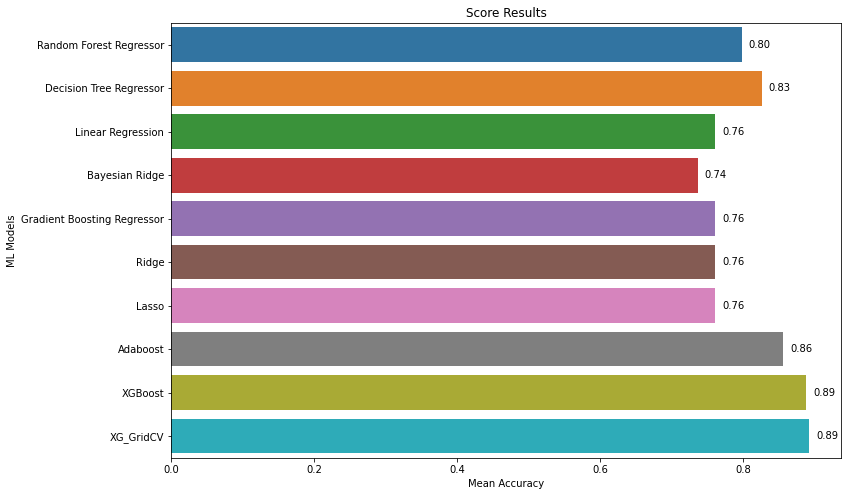

In [ ]:
predname_list=["Random Forest Regressor","Decision Tree Regressor","Linear Regression","Bayesian Ridge","Gradient Boosting Regressor","Ridge","Lasso", "Adaboost", "XGBoost", "XG_GridCV"]
score_results = pd.DataFrame({"Score Results":score_result, "ML Models":predname_list})

fig, ax = plt.subplots()

ax = sns.barplot("Score Results", "ML Models", data = score_results)


for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.01,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

ax.set_xlabel("Mean Accuracy")
ax.set_title("Score Results")
plt.show()
